# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подготовка-тетради" data-toc-modified-id="Подготовка-тетради-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка тетради</a></span></li><li><span><a href="#Предварительный-анализ-данных" data-toc-modified-id="Предварительный-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предварительный анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Функция-работы-с-моделями-обучения" data-toc-modified-id="Функция-работы-с-моделями-обучения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функция работы с моделями обучения</a></span></li><li><span><a href="#Применение-функций-моделей" data-toc-modified-id="Применение-функций-моделей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Применение функций моделей</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Проведение-тестирования" data-toc-modified-id="Проведение-тестирования-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проведение тестирования</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

### Подготовка тетради

In [1]:
# Базовые библиотеки
import numpy as np
import pandas as pd
import os # Загрузка датафрейма
import time # Оценка времени выполнения кода

# Работа с текстом
import re # Очистка текста от ненужных знаков
from pymystem3 import Mystem # Лучшая лемматизация русского текста
import nltk # Импорт всех модулей библиотеки для работы с текстами
from nltk import WordNetLemmatizer # Классическая лемматизация английского текста
from nltk.corpus import wordnet # Анализатор POS-тегов
from nltk import pos_tag # Да Функция анализатора POS-тегов
nltk.download('averaged_perceptron_tagger') # Дополнительный модуль для работы с POS-тегами
from nltk.probability import FreqDist # Для создания облака слов
#import spacy # Продвинутая лемматизация английского текстах 

# Базовые элементы Sklearn для создания собстенных классов, используемых в Pipeline
"""from sklearn.base import(
    TransformerMixin, 
    BaseEstimator
)"""

# Предобработка данных
from sklearn.preprocessing import(
    #StandardScaler, # стандартизация
    MaxAbsScaler, # стандартизация по максимальному абсолютном значению в пределах 0-1
    #normalize # нормализация значений аттрибутов
)

# Работа с датафреймом
from sklearn.model_selection import (
    cross_val_score, 
    train_test_split, # Разделение выборок на обучающую и тестовую
    GridSearchCV, # Поиск гиперпараметров по сетке (GridSearch)
    StratifiedKFold, # Кроссвалидация с указанием количества фолдов (частей, на которые будет разбита обучающая выборка, одна из которых будет участвовать в валидации)
    KFold, # Кроссвалидация 
    cross_val_score # Оценка качества модели на кроссвалидации
) 
from sklearn.feature_extraction.text import TfidfVectorizer # Векторизация текстов 

# Автоматизация раздельного декодирования признаков
from sklearn.compose import(
    make_column_selector, 
    make_column_transformer, 
    ColumnTransformer
)

# Pipeline (пайплайн)
!pip install imblearn
#!pip install -U imblearn
#!pip install -U imbalanced-learn
#conda install -c conda-forge imbalanced-learn
#conda install -c glemaitre imbalanced-learn
from imblearn.pipeline import Pipeline # Более предпочтительнее для TfidfVectorizer
from imblearn.over_sampling import SMOTE # Балансировка классов в Pipeline
from sklearn.pipeline import make_pipeline # Pipeline с автоматическим названием шагов.

# Функция для поддержки экспериментальной функции HavingGridSearchSV
from sklearn.experimental import enable_halving_search_cv
# Ускоренная автоматизация поиска лучших моделей и их параметров
from sklearn.model_selection import HalvingGridSearchCV
# Ускоренная автоматизация рандомного поиска лучших моделей и их параметров
from sklearn.model_selection import HalvingRandomSearchCV

# Модели 
from sklearn.linear_model import LogisticRegression # Линейная регрессия. Классификация
#from sklearn.tree import DecisionTreeClassifier # Решающее дерево. Классификация
#from sklearn.ensemble import RandomForestClassifier # Случайный лес. Классификация
from catboost import CatBoostClassifier # CatBoost (Яндекс). Классификация
from sklearn.naive_bayes import ComplementNB # Улучшенный классификатор для не сбалансированных классов

# Метрики
from sklearn.metrics import f1_score # F1 - среднегармоническое между precision_score и recall_score

# Визуализация графиков
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
from pandas.plotting import scatter_matrix


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Отображение всех столбцов таблицы
pd.set_option('display.max_columns', None)
# Обязательно для нормального отображения графиков plt
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
# Дополнительно и не обязательно для декорирования графиков
factor = .8
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi * factor


In [3]:
# Глобальное значение "random_state" 
STATE = 42


### Предварительный анализ данных

In [4]:
# Загрузка данных
if os.path.exists('datasets/toxic_comments.csv'):
    data = pd.read_csv('toxic_comments.csv')
elif os.path.exists('/datasets/toxic_comments.csv'):
    data = pd.read_csv('/datasets/toxic_comments.csv')
else:
    print('Файл не найден')


In [5]:
# Анализ датафрейма
print(data.info())
data.sample(n=10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
None


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [7]:
# Анализ уникальных значений 
# категориального признака "text"
data.toxic.unique()


array([0, 1])

<AxesSubplot:>

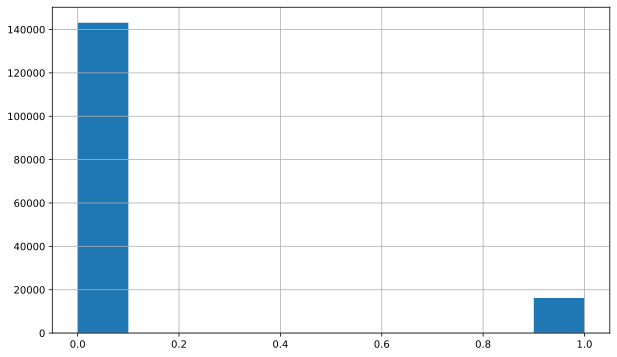

In [8]:
# Анализ баланса классов
# целевой переменной
data['toxic'].hist(); 


**Вылов из предварительного анализа данных**
1. Датафрейм содержит 159292 объекта без пропусков и 3 признака. Признак `text` содержит исходные тексты твитов, является не целевым и будет использован в обучении и предсказании. Признак `toxic` содержит данные по классификации текстов и явялется целевым.
1. Признак `toxic` содержит только `0` и `1`, но, при этом, имеет тип данных `int64`. Его следует оптимизировать до `uint8`.
1. Признак `toxic` является целевыми с не сбалансированными классами и многократным перевесом в пользу класса `0`. Этот файкт требуется учесть при делении датафрейма на обучающие и тестовые выборки.
1. Признак `Unnamed: 0` не содержит ценной для обучения информации и не будет использован в дальнейшем анализе и обучении моделей.


### Предобработка данных

In [9]:
# Ограничение выборки для ускорения проверки кода
#data = data.loc[:10000, :]


In [10]:
# Оптимизация типов данных
data['toxic'] = data['toxic'].astype('uint8')
#data['text'] = data['text'].values.astype('U') # Приводит к падению ядра и его автоматическом перезапуску


In [11]:
# Функция очистки 
# английского и русского текста 
# от ненужных символов
def clear_symbols(text, lenguage):
    if lenguage == 'ru':
        return ' '.join(re.sub(r'[^а-яА-ЯёЁ ]', ' ', text).split()) 
    elif lenguage == 'en':
        return ' '.join(re.sub(r'[^a-zA-Z ]', ' ', text).split()) 
    

In [12]:
# Функция работы с POS-тегами
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper() 
    tag_dict = {
        'J': wordnet.ADJ, 
        'N': wordnet.NOUN,  
        'V': wordnet.VERB, 
        'R': wordnet.ADV, 
    } 
    return tag_dict.get(tag, wordnet.NOUN) 


In [13]:
# Функция лемматизации 
# русских и английских текстов
def lemmatize(text, lenguage):
    if lenguage == 'ru':
        lemmatizer = Mystem() 
        lemms = lemmatizer.lemmatize(text) 
    elif lenguage == 'en':
        lemmatizer = WordNetLemmatizer() 
        lemms = lemmatizer.lemmatize(text, get_wordnet_pos(text)) 
    string = ''
    for i in lemms:
        string += i
    return string


In [14]:
# Очистка и лемматизация 
# русских текстов
corpus_ru = data['text'].apply(
    lambda x: lemmatize(clear_symbols(x, 'ru'), 'ru') 
) 


In [15]:
# Очистка и лемматизация 
# английских текстов
corpus_eng = data['text'].apply(
    lambda x: lemmatize(clear_symbols(x, 'en'), 'en') 
) 


In [16]:
# Добавление лемм в датафрейм
data['corpus'] = pd.DataFrame(corpus_ru) + ' ' + pd.DataFrame(corpus_eng) 
# Приведение лемм к нижнему регистру
data['corpus'] = data['corpus'].str.lower() 

# Очистка памяти 
# от неиспользуемых переменных
#del corpus_ru, corpus_eng


In [17]:
# Добавление нового признака 
# с количеством слов в тексте
data['numbers_of_words'] = data['corpus'].copy().str.split().str.len().values
print(data['numbers_of_words'].describe()) 
data['numbers_of_words'].head() 


count    159292.000000
mean         68.079596
std         100.851423
min           0.000000
25%          17.000000
50%          36.000000
75%          76.000000
max        1403.000000
Name: numbers_of_words, dtype: float64


0     46
1     16
2     44
3    116
4     14
Name: numbers_of_words, dtype: int64

In [18]:
# # Добавление нового признака 
# со средней длиной слов
#data['average_word_lenght'] = (data['corpus'].str.len() / data['numbers_of_words']).round() 
data['average_word_lenght'] = (data['corpus'].str.len() / data['numbers_of_words'])
print(data['average_word_lenght'].describe())  
print() 

data.loc[data['average_word_lenght'] > data['average_word_lenght'].median()*2, 'average_word_lenght'] = data['average_word_lenght'].median() 
print(data['average_word_lenght'].describe())  
data['average_word_lenght'].head() 


count    1.592920e+05
mean              inf
std               NaN
min      2.000000e+00
25%      5.037736e+00
50%      5.400000e+00
75%      5.758621e+00
max               inf
Name: average_word_lenght, dtype: float64

count    159292.000000
mean          5.435757
std           0.665085
min           2.000000
25%           5.037736
50%           5.400000
75%           5.757576
max          10.750000
Name: average_word_lenght, dtype: float64


0    5.413043
1    5.562500
2    5.227273
3    5.189655
4    4.571429
Name: average_word_lenght, dtype: float64

In [19]:
# Проверка датафрейма с леммами
print('corpus:', data.loc[data['corpus'] != '', 'corpus'].count())
print()
data.loc[data['corpus'] != ''].head(25)


corpus: 159292



,Unnamed: 0,text,toxic,corpus,numbers_of_words,average_word_lenght
0,0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my usern...,46,5.413043
1,1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m s...,16,5.562500
2,2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it ...,44,5.227273
3,3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on imp...,116,5.189655
4,4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember w...,14,4.571429
5,5,"""\n\nCongratulations from me as well, use the ...",0,congratulations from me as well use the tools...,10,5.600000
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,cocksucker before you piss around on my work,8,5.625000
7,7,Your vandalism to the Matt Shirvington article...,0,your vandalism to the matt shirvington articl...,21,5.333333
8,8,Sorry if the word 'nonsense' was offensive to ...,0,sorry if the word nonsense was offensive to y...,86,5.186047
9,9,alignment on this subject and which are contra...,0,alignment on this subject and which are contr...,12,5.916667


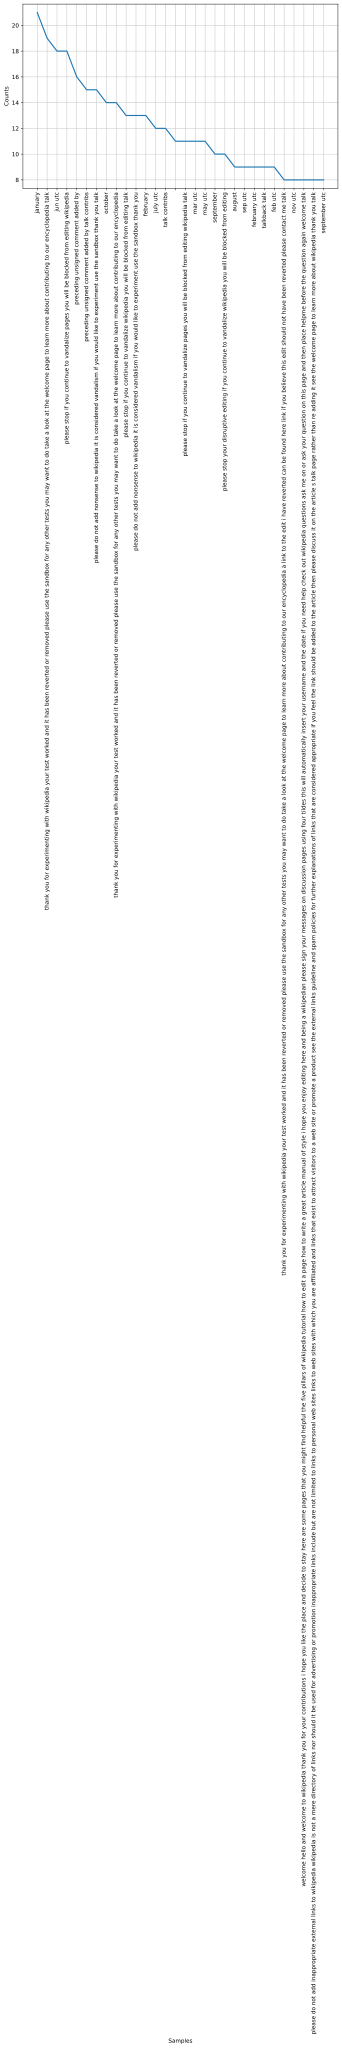

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# Облако слов
fdist = FreqDist(data['corpus'])
fdist.plot(30, cumulative=False)


In [21]:
# Разделение датафрейма 
# на целевую и нецелевую выборки
features = data[['corpus', 'numbers_of_words', 'average_word_lenght']]
target = data['toxic']

# Разделение выборок 
# на обучающие и тестовые
features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    test_size=.25, 
    stratify=target, 
    random_state=STATE
) 

# Очистка памяти 
# от неиспользуемых переменных
del data, features, target


In [22]:
# Проверка размерности
print('features_train:', len(features_train))  
print('target_train:', len(target_train)) 
print('features_test:', len(features_test))
print('target_test:', len(target_test)) 


features_train: 119469
target_train: 119469
features_test: 39823
target_test: 39823


## Обучение

### Функция работы с моделями обучения

In [29]:
# Model + Params + Pipeline + HalvingGridSearchCV
def model_pipeline_gridsearch(
    features_train, 
    target_train, 
    model, 
    params, 
    data_grids, 
    data_times 
):
    
    # Начало отслеживания времени
    start_time = time.time() 
    
    # Pipeline
    pipeline = Pipeline([
        ('vect', ColumnTransformer([
            ('tfidf', TfidfVectorizer(), 'corpus'), # векторизация текстов
            ('stdm', MaxAbsScaler(), features_train[['numbers_of_words', 'average_word_lenght']].columns) # стандартизация данных
        ], remainder='drop' # удаление исходного атрибута с текстами
        )), 
        ('sampl', SMOTE(random_state=STATE)), # сэмплирование данных (приведение классов в равновесие) за счет создания синтетических данных из минорного класса
        ('clf', model) # модель классификации 
    ])
    
    # HalvingGridSearchCV
    # (о подборе оптимальных параметров:
    # https://scikit-learn.ru/3-2-tuning-the-hyper-parameters-of-an-estimator/)
    #grid = HalvingRandomSearchCV(
    grid = HalvingGridSearchCV(
        pipeline, 
        params, 
        cv=4, # параметр KFold для кроссвалидации (обучющая и валидационная выборки 75:25)
        n_jobs=-1, # количество параллельно выполняемых заданий (-1 - задействованы все процессоры)
        scoring='f1', # функция ошибки
        error_score='raise', #0 # в случае неполадки 'raise' - возвращает ошибку, int - возвращает FitFailedWarning
        random_state=STATE
    ) 
    
    # Обучение
    grid.fit(features_train, target_train)
    
    # Подсчет времени выполнения скрипта
    finish_time = time.time()
    funtion_time = finish_time - start_time
    
    data_grids.append(grid)
    data_times.append(funtion_time) 
    
    return data_grids, data_times


In [30]:
# Вывод на печать результатов модели
def print_model_result(grids, data_times, model_name):
    print('Модель    :', model_name)
    print('Метрика F1:', grids[-1].best_score_)
    print(f'Время     : {data_times[-1]} секунд')
    print('Параметры :\n', grids[-1].best_estimator_)
    print()
    print('-'*20)
    print()


### Применение функций моделей

In [31]:
# Поиск лучших моделей и их параметров
data_grids = []
data_times = []


In [32]:
# LogisticRegression

params = [{
    # Параметры векторизации
    #'vect__tfidf__max_df': (0.2, 0.5, 0.8),
    #'vect__tfidf__min_df': (1, 5, 9),
    #'vect__tfidf__ngram_range': ((1, 1), (1, 2)), # униграммы или биграммы
    #'vect__tfidf__max_features':(1000, 30000),
    #'vect__tfidf__norm': ('l1' , 'l2'), 
    # Параметры модели
    #'clf__penalty': (None, 'l2') 
}]

data_grids, data_times = model_pipeline_gridsearch(
    features_train, 
    target_train, 
    LogisticRegression(random_state=STATE), 
    params, 
    data_grids, 
    data_times 
)

print_model_result(data_grids, data_times, 'LogisticRegression')


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Модель    : LogisticRegression
Метрика F1: 0.7322326263002149
Время     : 849.2860035896301 секунд
Параметры :
 Pipeline(steps=[('vect',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'corpus'),
                                                 ('stdm', MaxAbsScaler(),
                                                  Index(['numbers_of_words', 'average_word_lenght'], dtype='object'))])),
                ('sampl', SMOTE(random_state=42)),
                ('clf', LogisticRegression(random_state=42))])

--------------------



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# ComplementNB

params = [{
    # Параметры векторизации
    #'vect__tfidf__max_df': (0.2, 0.5, 0.8),
    #'vect__tfidf__min_df': (1, 5, 9),
    #'vect__tfidf__ngram_range': ((1, 1), (1, 2)), # униграммы или биграммы
    #'vect__tfidf__max_features':(1000, 50000),
    #'vect__tfidf__norm' : ('l1' , 'l2')
}]

data_grids, data_times = model_pipeline_gridsearch(
    features_train, 
    target_train, 
    ComplementNB(), 
    params, 
    data_grids, 
    data_times 
)

print_model_result(data_grids, data_times, 'ComplementNB')


Модель    : ComplementNB
Метрика F1: 0.6792250211656703
Время     : 596.5407702922821 секунд
Параметры :
 Pipeline(steps=[('vect',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'corpus'),
                                                 ('stdm', MaxAbsScaler(),
                                                  Index(['numbers_of_words', 'average_word_lenght'], dtype='object'))])),
                ('sampl', SMOTE(random_state=42)), ('clf', ComplementNB())])

--------------------



In [34]:
# CatBoostClassifier

params = [{
    # Параметры векторизации
    #'vect__tfidf__max_df': (0.2, 0.8),
    #'vect__tfidf__min_df': (2, 8)
    #'vect__tfidf__ngram_range': ((1, 1), (1, 2)), # униграммы или биграммы
    #'vect__tfidf__max_features':(1000),
    #'vect__tfidf__norm' : ('l1' , 'l2')
}]

data_grids, data_times = model_pipeline_gridsearch(
    features_train, 
    target_train, 
    CatBoostClassifier(logging_level='Silent', random_state=STATE), # logging_level='Silent' под вопросом
    params, 
    data_grids, 
    data_times 
)

print_model_result(data_grids, data_times, 'CatBoostClassifier')


Модель    : CatBoostClassifier
Метрика F1: 0.752827196527211
Время     : 16213.06224489212 секунд
Параметры :
 Pipeline(steps=[('vect',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'corpus'),
                                                 ('stdm', MaxAbsScaler(),
                                                  Index(['numbers_of_words', 'average_word_lenght'], dtype='object'))])),
                ('sampl', SMOTE(random_state=42)),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x7f48adcdf460>)])

--------------------



### Выбор лучшей модели

In [35]:
# Лучшая модель из расчета RMSE
data_grids_best = data_grids[0]
data_times_best = data_times[0]
n = 0
for i in range(0, len(data_grids)):
    if data_grids[i].best_score_ > data_grids_best.best_score_: 
    #if (data_grids[i].best_score_ < data_grids_best.best_score_) & (data_times[i] < data_times_best): 
        data_grids_best = data_grids[i]
        data_times_best = data_times[i]

print('Лучшее время        : ', data_times_best)
print('Лучший показатель F1: ', data_grids_best.best_score_)
print('Лучшая модель       : ')
data_grids_best


Лучшее время        :  16213.06224489212
Лучший показатель F1:  0.752827196527211
Лучшая модель       : 


HalvingGridSearchCV(cv=4, error_score='raise',
                    estimator=Pipeline(steps=[('vect',
                                               ColumnTransformer(transformers=[('tfidf',
                                                                                TfidfVectorizer(),
                                                                                'corpus'),
                                                                               ('stdm',
                                                                                MaxAbsScaler(),
                                                                                Index(['numbers_of_words', 'average_word_lenght'], dtype='object'))])),
                                              ('sampl', SMOTE(random_state=42)),
                                              ('clf',
                                               <catboost.core.CatBoostClassifier object at 0x7f48adcc69a0>)]),
                    n_jobs=-1, param_grid=[{}], random_state=42, scoring='f1')

In [36]:
# Перевод лучшего времени в часы
data_times_best/60/60


4.503628401358922

**Выводы из выбора лучшей модели**

Лучший показатель `F1` 0.752827196527211 и время
16213.06224489212 секунд (ококло 4.5 часов) при обучении показала модель машинного обучения `CatBoostClassifier` с параметрами по умолчанию при использовании модели векторизации текстов `TfidfVectorizer` также с параметрами по умолчанию.

### Проведение тестирования

In [37]:
start_time = time.time()

# Предсказание лучшей модели
predict = data_grids_best.predict(features_test)

finish_time = time.time()
funtion_time = finish_time - start_time

# Расчет RMSE и времени выполнения предсказания
print('Показатель F1     :', f1_score(target_test, predict))
print(f'Время предсказания: {funtion_time} секунд')

Показатель F1     : 0.7507853403141361
Время предсказания: 2.7558162212371826 секунд


**Выводы из выбора лучшей модели**

Лучший показатель `F1` при тестировании модели машинного обучения `CatBoostClassifier` с параметрами по умолчанию при использовании модели векторизации текстов `TfidfVectorizer` с параметрами по умолчанию, показавшей лучший результат при обучении, равен 0.7507853403141361. Время выполнения кода при тестировании составляет
2.7558162212371826 секунд. 

## Выводы

Цель проекта достигнута. Выбрана модель машинного обучения, модель векторизации текстов и их параметры, позволившие эффективно предсказывать классификацию текстов на токсичные и не токсичные с показателем метрики `F1` более 0.75.

Для достижения цели проекта были выполнены следующие действия:
1. Подготовлена тетрадь Jupyter Notebook, загружены и проанализированы данные. 
1. Подготовлены данные для обучения. 
1. Обучены несколько моделей машинного обучения и из них выбрана лучшая на основании метрики `F1`. 
1. Выбранная лучшая модель протестирована. 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны